# Titanic EDA

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

%matplotlib inline
import matplotlib as mplt
import matplotlib.pyplot as plt
from  matplotlib.ticker import PercentFormatter
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_csv("train.csv")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


- PassengerID— A column added by Kaggle to identify each row and make submissions easier
- Survived— Whether the passenger survived or not and the value we are predicting (0=No, 1=Yes)
- Pclass— The class of the ticket the passenger purchased (1=1st, 2=2nd, 3=3rd)
- Sex— The passenger’s sex
- Age— The passenger’s age in years
- SibSp— The number of siblings or spouses the passenger had aboard the Titanic
- Parch— The number of parents or children the passenger had aboard the Titanic
- Ticket— The passenger’s ticket number
- Fare— The fare the passenger paid
- Cabin— The passenger’s cabin number
- Embarked— The port where the passenger embarked (C=Cherbourg, Q=Queenstown, S=Southampton)

### Identifying Numerical and Categorical Features

In [11]:
# Define function
def type_features(data):
    categorical_features = train.select_dtypes(include='object').columns
    numerical_features = train.select_dtypes(exclude='object').columns
    print('categorical_features : ', categorical_features)
    print('------'*15)
    print('categorical_features : ', numerical_features)
    
type_features(train)

categorical_features :  Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')
------------------------------------------------------------------------------------------
categorical_features :  Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


### Identifying missing data

,Total,Percent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


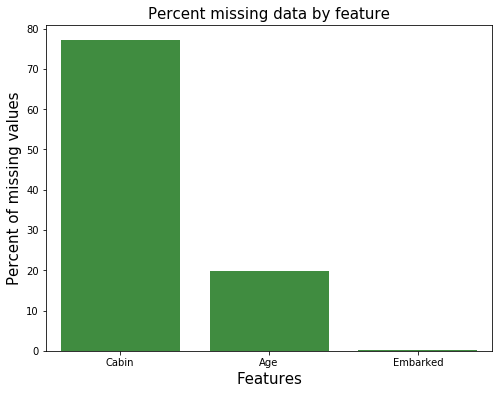

In [26]:
def missingdata(data):
    
    # Create datasets
    total = data.isnull().sum().sort_values(ascending = False)    # get descending order
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    # Combine datasets
    ms = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  
    ms = ms[ms["Percent"] > 0]   # exclude non-missing values
    
    f,ax =plt.subplots(figsize=(8,6))
    fig=sns.barplot(ms.index, ms["Percent"],color="green",alpha=0.8)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    return ms

missingdata(train)

### Checking the Imbalance of Target Variable

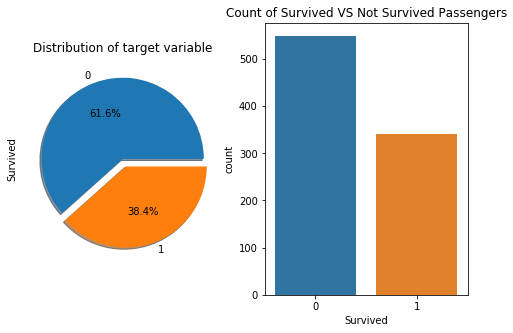

In [29]:
f,ax=plt.subplots(1,2,figsize=(8,5))

# pie chart
train.Survived.value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',
                                       ax=ax[0],shadow=True)
ax[0].set_title('Distribution of target variable')

# bar chart
sns.countplot('Survived', data=train, ax=ax[1])
ax[1].set_title('Count of Survived VS Not Survived Passengers')
plt.show() 

### Distribution of Survival Rates by Age

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


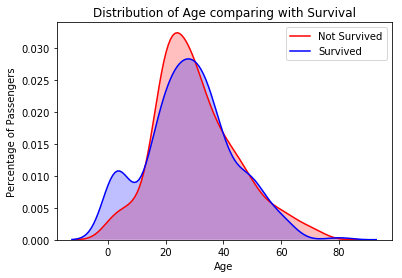

In [30]:
# Age distribution
t = sns.kdeplot(train.Age[(train["Survived"] == 0)], color='Red', shade = True)
t = sns.kdeplot(train.Age[(train["Survived"] == 1)], color="Blue", shade= True)

t.set_xlabel("Age")
t.set_ylabel("Percentage of Passengers")
plt.title('Distribution of Age comparing with Survival')
t = t.legend(["Not Survived","Survived"])

- More than half of children between 0-10 year of Age on the Titanic survived.
- Passengers between 15-30 years of Age have a significantly higher percentage of non-survivors as compared to survivors.

A passenger's age might be useful in predicting his/her survival. Let's remove observations with missing values for Age.

### Class

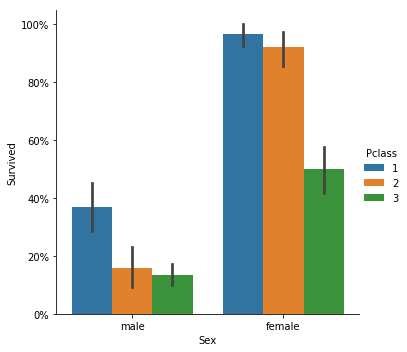

In [31]:
g = sns.catplot(x="Sex", y="Survived", hue="Pclass", 
                  kind="bar", data=train)

for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))
    # Percentages are computed as ``x / xmax * 100``
    
plt.show()

- Female has a much higher surviving rate
- Pclass1 has a much higher surviving rate

In [11]:
# train.loc[(train["Survived"] == 0) & (train["Pclass"] == 1)]

### Fare

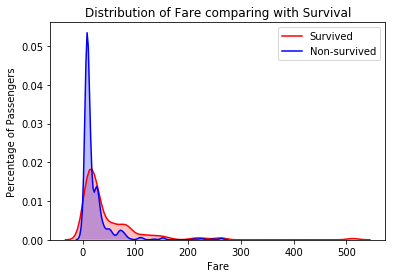

In [13]:
# Fare distribution
t = sns.kdeplot(train.Fare[(train["Survived"] == 1)], color='Red', shade = True)
t = sns.kdeplot(train.Fare[(train["Survived"] == 0)], color="Blue", shade= True)
t.set_xlabel("Fare")
t.set_ylabel("Percentage of Passengers")
plt.title('Distribution of Fare comparing with Survival')
t = t.legend(["Survived","Non-survived"])

Those who pay high fair is survived

### Family (Parch and SibSp)

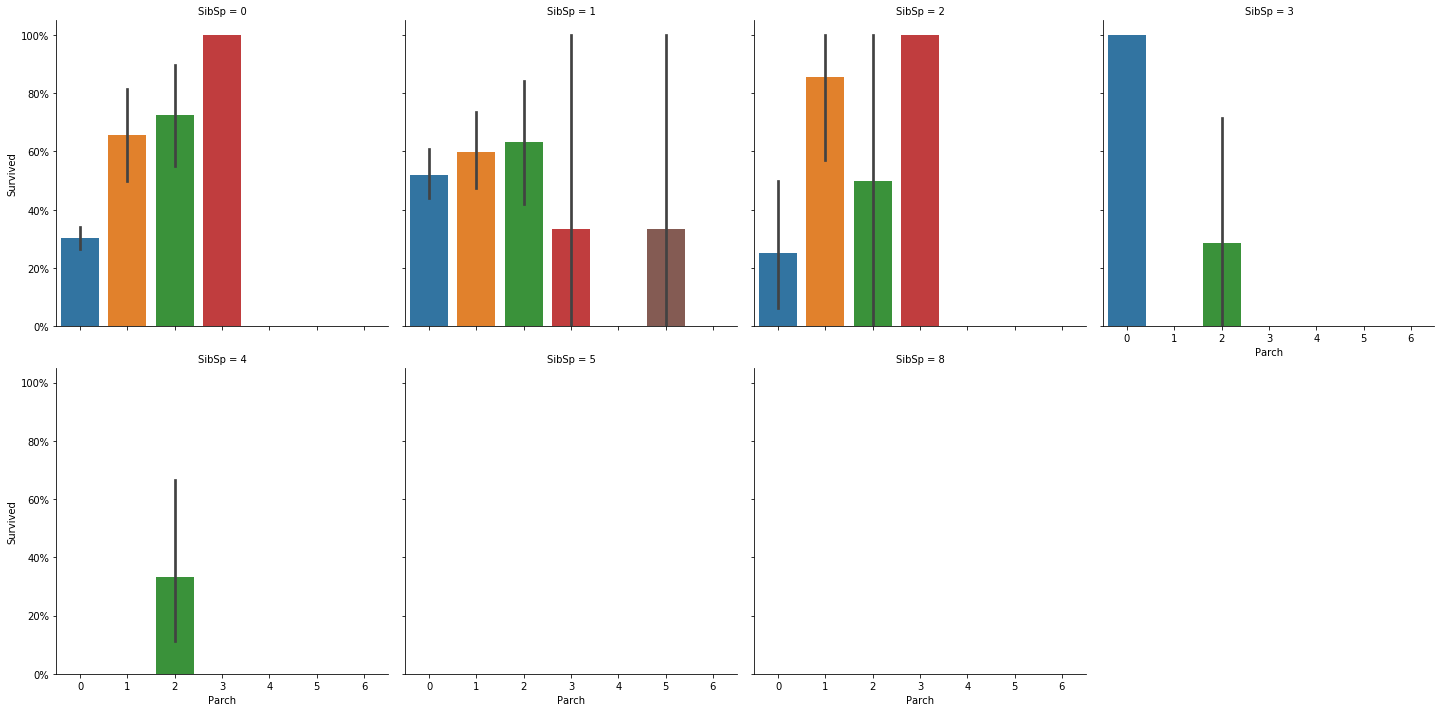

In [33]:
g = sns.catplot(x="Parch", y="Survived", col='SibSp', col_wrap=4,
                  kind="bar", data=train)

for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))
    # Percentages are computed as ``x / xmax * 100``  SibSp	Parch
    
plt.show()

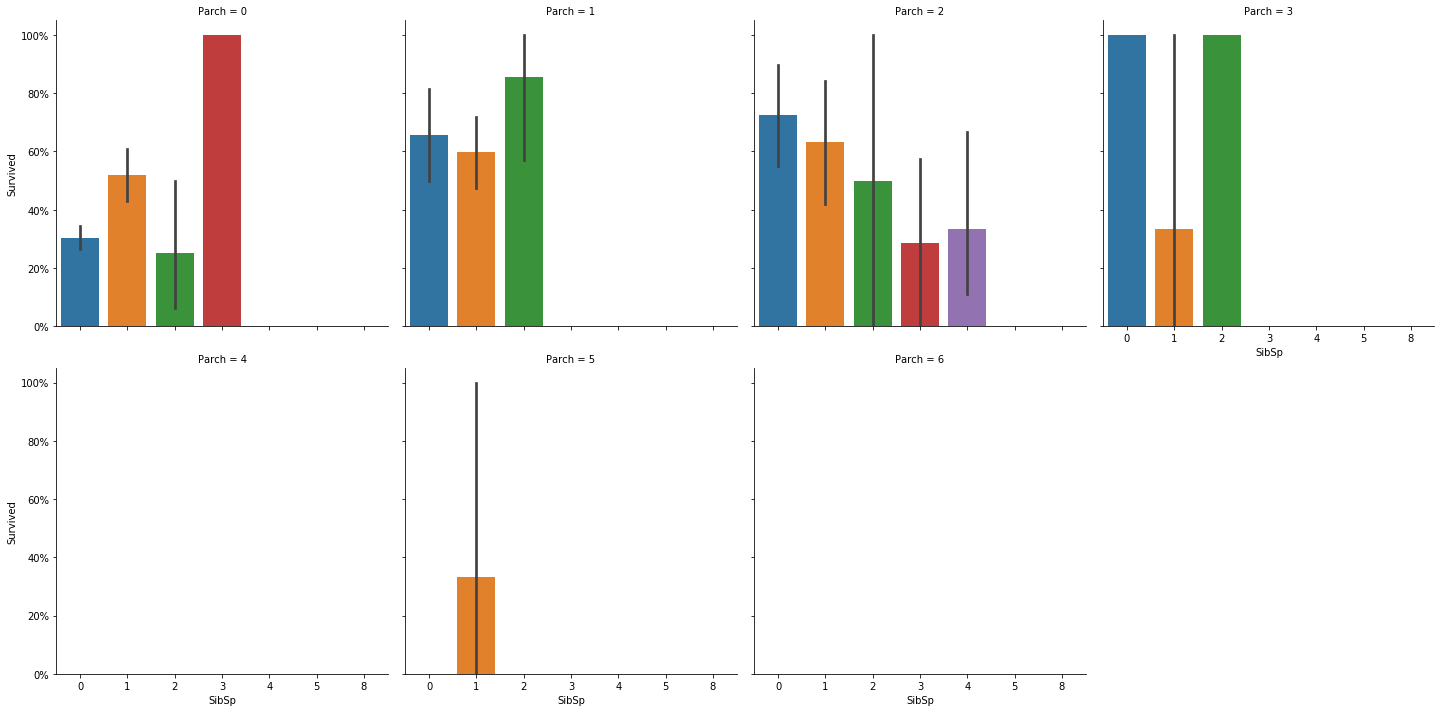

In [35]:
g = sns.catplot(x="SibSp", y="Survived", col='Parch', col_wrap=4,
                  kind="bar", data=train)

for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))
    # Percentages are computed as ``x / xmax * 100``  
    
plt.show()

Large family group has lower survival rate. Can just merge them together